In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
probability_win = 0.55
DISCOUNT_FACTOR = 0.9
reward_table = np.zeros(101)
reward_table[100] = 1

class StrategyUpdater:
    def __init__(self):
        self.value_states = np.zeros(101)
        self.optimal_strategy = np.zeros(100)

    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def evaluate_strategy(self, tolerance=1e-14):
        while True:
            # TODO: Evaluate state values for the current strategy until convergence
            # Convergence: The difference in state values between iterations is less than tolerance
            max_diff = 0 
            for position in range(1,100):
                old_value = self.value_states[position]
                bet = int (self.optimal_strategy[position])
                if position + bet > 100:
                    break
                if old_value + bet > 100:
                    break
                new_value = self.calculate_value(position,bet,self.value_states)
                diff = abs(new_value - old_value)
                max_diff = max(diff,max_diff)
            if max_diff < tolerance :
                break
                    

        return self.update_strategy()

    def evaluate_strategy_with_equations(self):
        # TODO: Implement strategy evaluation using a system of linear equations
        
        return self.update_strategy()

    def update_strategy(self):
        # TODO: Implement the strategy improvement algorithm
        for position in range(1,100):
            best_value = float('-inf')
            best_bet = 0
            for bet in range(1 , position + 1):
                if (position + bet) >100 :
                    break
                value = self.calculate_value(position,bet,self.value_states)
                if value > best_value:
                    best_value = value
                    best_bet = bet
                # self.value_states[position] = best_value
            self.optimal_strategy[position] = best_bet
        

        return self.value_states, self.optimal_strategy


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


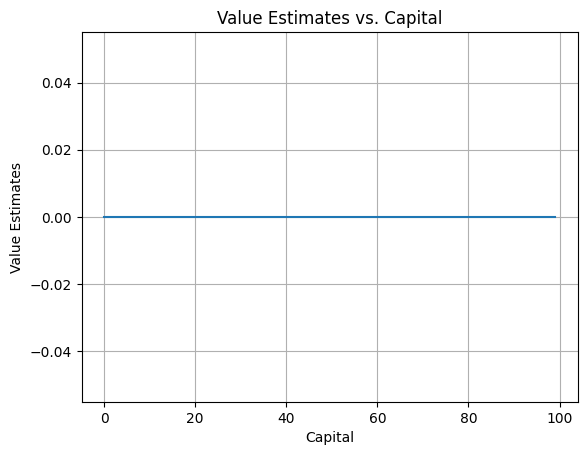

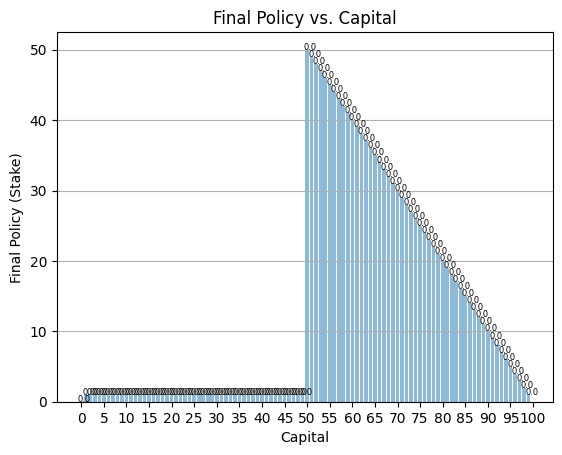

In [43]:
su = StrategyUpdater()
value_estimates, final_strategy = su.evaluate_strategy()
# TODO: perform this once by solving equations too
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()

In [3]:
# Implementing value iteration and strategy improvement algorithms
probability_win = 0.55
DISCOUNT_FACTOR = 0.9
reward_table = np.zeros(101)
reward_table[100] = 1

class ValueCalculator:
    def __init__(self):
        self.value_states = np.zeros(101, dtype=np.float64)
        self.optimal_strategy = np.zeros(100, dtype=np.float64)

        # self.value_states = np.zeros(101)
        # self.optimal_strategy = np.zeros(100)

    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def perform_value_iteration(self, tolerance=1e-50):
        # TODO: Implement the value iteration algorithm

        while True:
            old_value_states = np.copy(self.value_states)

            for position in range(1, 100):
                best_value = float('-inf')
                for bet in range(1 , position + 1):
                    if (position + bet) >100 :
                        break
                    value = self.calculate_value(position,bet,self.value_states)
                    if value > best_value:
                        best_value = value
                self.value_states[position] = best_value 

            abs_diff = np.abs(self.value_states - old_value_states)
            max_diff = np.max(abs_diff)
            if max_diff < tolerance:
                break   


        return self.perform_strategy_update()

    def perform_strategy_update(self):
        # TODO: Implement the strategy improvement algorithm

        for position in range(1, 100):
                best_value = float('-inf')
                best_bet = 0
                for bet in range(1 , position + 1):
                    if (position + bet) >100 :
                        break
                    value = self.calculate_value(position,bet,self.value_states)
                    if value > best_value:
                        best_value = value
                        best_bet = bet
                # self.value_states[position] = best_value
                self.optimal_strategy[position] = best_bet
        return self.value_states, self.optimal_strategy


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9. 17.
  7.  6. 20.  4.  3. 23. 24. 25. 24. 27. 22. 21. 20. 31. 18. 33. 34. 35.
 14. 13. 12. 11. 40. 41.  8.  7.  6.  5.  4.  3. 48.  1. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


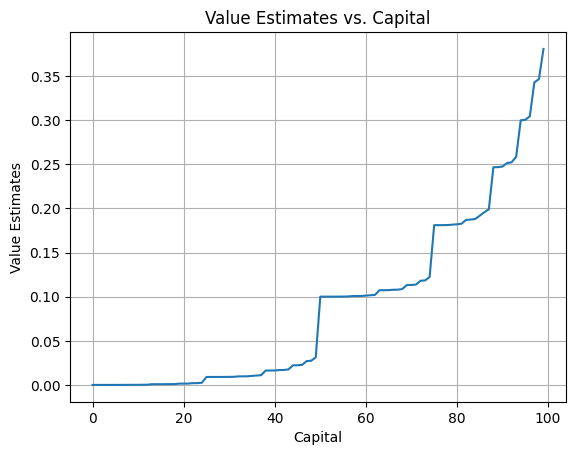

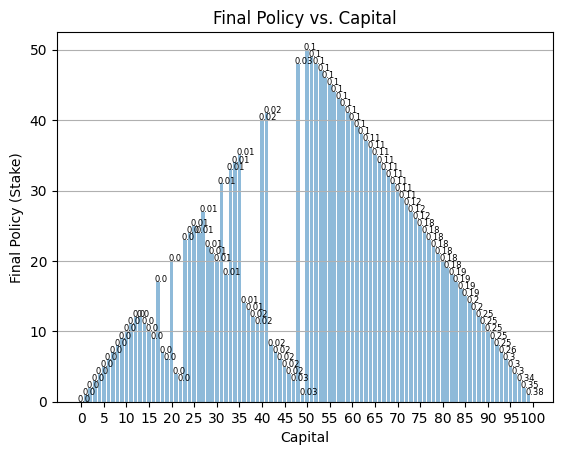

In [5]:
# Initialize and run value iteration
vc = ValueCalculator()
value_estimates, final_strategy = vc.perform_value_iteration()
# print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()
